In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load data set
alcohol = pd.read_csv("alcohol.txt")
# Remove squaredal terms - these terms i
alcohol.drop(['agesq','beertaxsq','cigtaxsq','ethanolsq','educsq'],axis=1,inplace=True)
alcohol.head()

,id,abuse,status,unemrate,age,educ,married,famsize,white,exhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
0,1,1,1,4.0,50,4,1,1,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,0,0
1,2,0,3,4.0,37,12,1,5,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
2,3,0,3,4.0,53,9,1,3,1,1,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
3,4,0,3,3.3,59,11,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,0,0,1,1
4,5,0,3,3.3,43,10,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,1,1,1,1


(array([8848.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

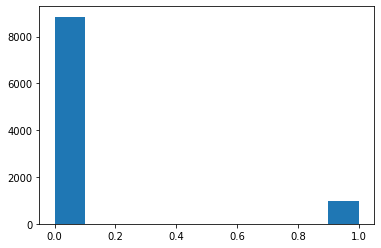

In [4]:
# this plot shows how unbalanced the data set is
plt.hist(alcohol.abuse)

In [5]:
# generate special classes for types
count0, count1 = alcohol.abuse.value_counts()
aclass0 = alcohol[alcohol.abuse==0]
aclass1 = alcohol[alcohol.abuse==1]
print(count0)
print(count1)

8848
974


In [6]:
# under sampling
# Generate sample of class 0 types matching number of class 1 types
under0 = aclass0.sample(count1)
alcoholus = pd.concat([under0,aclass1],axis=0)

(array([974.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

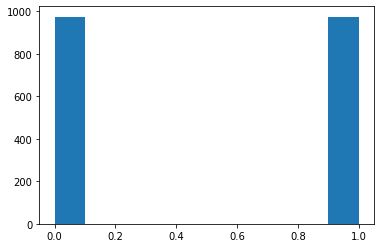

In [7]:
plt.hist(alcoholus.abuse)

In [8]:
# set up data, and check if balanced
y = alcoholus.abuse
X = alcoholus.iloc[:,2:33]
print(np.mean(y))
X.head()

0.5


,status,unemrate,age,educ,married,famsize,white,exhealth,vghealth,goodhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
2904,3,7.3,25,16,0,1,1,1,0,0,...,1,0,0.446,20.5,1.91736,0,0,0,1,1
2979,3,6.8,45,18,1,3,0,0,1,0,...,1,0,0.158,20.0,2.12700,0,0,0,1,1
7279,3,7.3,28,2,1,4,1,1,0,0,...,0,1,0.446,20.5,1.91736,0,0,0,1,1
216,3,5.1,55,12,1,4,1,1,0,0,...,0,0,0.240,18.0,1.79757,0,0,0,1,1
6106,3,5.3,41,12,1,3,1,1,0,0,...,0,1,0.090,10.0,2.40819,0,1,0,1,1


    rank_test_score  mean_test_score param_logisticregression__C
0                15         0.490862                       1e-05
1                14         0.540760                      0.0001
2                 1         0.571807                       0.001
3                13         0.570554                        0.01
4                 2         0.570965                         0.1
5                 3         0.570862                           1
6                12         0.570760                          10
7                 4         0.570780                         100
8                 4         0.570780                        1000
9                 4         0.570780                       10000
10                4         0.570780                      100000
11                4         0.570780                       1e+06
12                4         0.570780                       1e+07
13                4         0.570780                       1e+08
14                4      

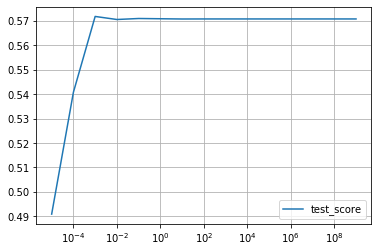

In [19]:
#Logistic regression

#monte-carlo
nmc = 100

# List of C's to try
Clist = np.power(10.,range(-5,10))

# Build pipeline
#   Note: model names are given names, but all small letters (odd system)
fullModel = make_pipeline(StandardScaler(),LogisticRegression(solver='lbfgs'))

# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
param_grid={'logisticregression__C':Clist,'logisticregression__max_iter':[3000]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_logisticregression__C']])

#plot the result
plt.semilogx(Clist,results[['mean_test_score']],label = "test_score")
plt.legend()
plt.grid()

In [24]:
result = results[['rank_test_score','mean_test_score','param_logisticregression__C']]
C = result[result.rank_test_score==1].iat[0,2]
score = result[result.rank_test_score==1].iat[0,1]
print("The optimized C is", C, "and the test score is {:.3f}.".format(score))

The optimized C is 0.001 and the test score is 0.572.


   rank_test_score  mean_test_score param_kneighborsclassifier__n_neighbors
0                7         0.516715                                      10
1                3         0.537207                                      50
2                1         0.546468                                     100
3                2         0.539713                                     200
4                4         0.533778                                     300
5                5         0.528645                                     400
6                6         0.525359                                     500


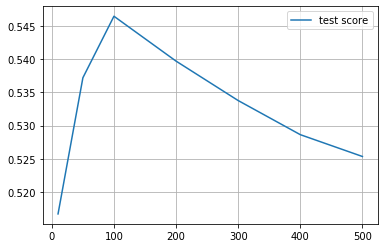

In [22]:
#KNN

#range of neighbors as required
neighbors_settings = [10,50,100,200,300,400,500]
#monte-carlo
nmc=100

#   Note: model names are given names, but all small letters
fullModel_knn = make_pipeline(StandardScaler(),KNeighborsClassifier())
# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
param_grid={'kneighborsclassifier__n_neighbors':[10,50,100,200,300,400,500]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(fullModel_knn,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results_knn = pd.DataFrame(grid_search.cv_results_)
print(results_knn[['rank_test_score','mean_test_score','param_kneighborsclassifier__n_neighbors']])

plt.plot(neighbors_settings,results_knn[['mean_test_score']],label="test score")
plt.legend()
plt.grid()

In [25]:
result_knn = results_knn[['rank_test_score','mean_test_score','param_kneighborsclassifier__n_neighbors']]
k_knn = result_knn[result_knn.rank_test_score==1].iat[0,2]
score_knn = result_knn[result_knn.rank_test_score==1].iat[0,1]
print("The optimized k is", k_knn,"and the test score is {:.3f}.".format(score_knn))

The optimized k is 100 and the test score is 0.546.


In [9]:
#random forest classifier

nmc = 100
#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':range(1,11),'max_depth':range(2,12,2),'n_estimators':[100]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])

    rank_test_score  mean_test_score param_max_features param_max_depth
0                50         0.545832                  1               2
1                48         0.552546                  2               2
2                41         0.553450                  3               2
3                42         0.553409                  4               2
4                43         0.553285                  5               2
5                34         0.554846                  6               2
6                38         0.553860                  7               2
7                35         0.554497                  8               2
8                45         0.552957                  9               2
9                37         0.554456                 10               2
10               33         0.554867                  1               4
11               24         0.557454                  2               4
12               21         0.558768                  3         

In [10]:
result = results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']]
max_feature = result[result.rank_test_score==1].iat[0,2]
depth = result[result.rank_test_score==1].iat[0,3]
score_tree = result[result.rank_test_score==1].iat[0,1]
print("The optimized feature size is",max_feature,", tree depth", depth,"and the test score is {:.4f}.".format(score_tree))

The optimized feature size is 8 , tree depth 6 and the test score is 0.5639.


In [11]:
#why no need for any rescaling for this model?
#Because each node in the tree is simply splitting a sorted list and not comparing one 
#feature's value to another feature's value.